In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\IRIS Flower.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

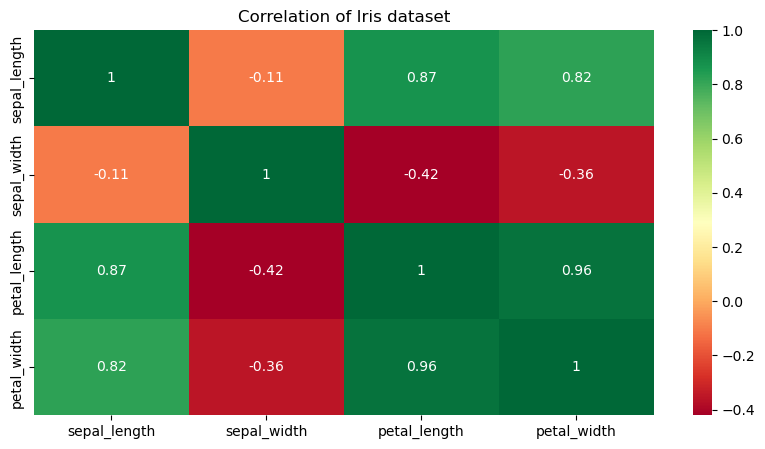

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

In [9]:
# Check unique values
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [11]:
#Check Null values
missing = df.isnull().sum()
print(missing)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [12]:
df.duplicated().sum()

3

In [13]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [19]:
X = df.drop(['species'], axis=1)
y = df['species']

In [25]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=71)

In [26]:
# Create model 
lg = LogisticRegression()
#Fit the model
lrfitting = lg.fit(X_train, y_train)

In [27]:
# Predict the model
y_pred = lrfitting.predict(X_test)

In [28]:
 #Evaluate the model
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.9322033898305084


In [29]:
#Print classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.90      0.90      0.90        20
 Iris-virginica       0.89      0.89      0.89        19

       accuracy                           0.93        59
      macro avg       0.93      0.93      0.93        59
   weighted avg       0.93      0.93      0.93        59



In [33]:
# Predict on new data
new_data = pd.DataFrame({
    'sepal_length': [5.0, 6.5, 5.9],
    'sepal_width': [3.5, 3.0, 3.0],
    'petal_length': [1.3, 5.5, 4.2],
    'petal_width': [0.3, 2.0, 1.5]
})
predictions = lrfitting.predict(new_data)


In [34]:
print(predictions)

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']
